#SHAP & SHAP Heatmap
##SHAP

Input:

> model class and setting

> model.pt

> X_train.npy : training data

> X_test.npy : testing data, can be all testing data, correct testing data, wrong testing data

Output:
> shap_calculator()
>> shap.npy: All SHAP values (output_num, data_num, sequence_num, feature_num)


##SHAP Heatmap

Input:

> shap.npy: All SHAP values (output_num, data_num, sequence_num, feature_num)

Output:
> shap_feature_sequence()
>> Picture of the heatmap by feature and sequence, and the percentage of each feature

> shap_feature_data()
>> Picture of the heatmap by feature and data

> shap_feature_detail()
>> Picture of the heatmap by feature and detail, and the percentage of each feature in each detail

> shap_data_sequence()
>> Picture of the heatmap by data and sequence

> shap_detail_sequence()
>> Pictures of the heatmap by detail_max and sequence, detail_min and sequence, detail and sequence


In [ ]:
!pip install shap
import shap
import numpy as np
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from torch import nn, optim
from torch.nn import functional as F

# below is for loading data from google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#SHAP 

Model class and setting for load model

In [ ]:
"""
model class, should cpoy from training model
"""
class BiLSTM_layer(nn.Module):
  pass

class DataEncoder(nn.Module):
  pass

class minmax_RuleEncoder(nn.Module):
  pass
    
class outbound_RuleEncoder(nn.Module):
  pass
    
class DataonlyNet(nn.Module):
  pass

class Net(nn.Module):
  pass

In [ ]:
"""
model setting, should cpoy from training model
"""
# merge = 

# input_dim = 
# input_dim_encoder = 
# output_dim_encoder = 
# hidden_dim_encoder = 
# hidden_dim_db = 
# output_dim_encoder = output_dim_encoder
# hidden_dim_encoder = hidden_dim_encoder
# hidden_dim_db = hidden_dim_db
# output_dim = 
# n_layers = 
# use_type=''

# outbound_rule_encoder = outbound_RuleEncoder(input_dim, output_dim_encoder, hidden_dim_encoder,dropout=0.3)
# minmax_rule_encoder = minmax_RuleEncoder(input_dim, output_dim_encoder, hidden_dim_encoder,dropout=0.3)
# data_encoder = DataEncoder(input_dim, output_dim_encoder, hidden_dim_encoder,dropout=0.3)

# if use_type=='no_rule':
#   model = Net(input_dim, output_dim, minmax_rule_encoder, outbound_rule_encoder, data_encoder, hidden_dim=hidden_dim_db, n_layers=n_layers, merge=merge)
# else:
#   model =DataonlyNet (input_dim, output_dim, data_encoder, hidden_dim=hidden_dim_db, n_layers=n_layers)

In [ ]:
sequence_num = 100

# put your folder path, ex: '/content/drive/MyDrive/.../'
folder_path = 'folderpath'

# put model name, ex: 'model.pt' for load model 
model = torch.load(folder_path + 'modelname')
model.eval()

# put train and test npy file path, ex: 'x_train.npy', 'x_test.npy','x_test_correct.npy'
X_train = np.load(folder_path + 'train')
X_test = np.load(folder_path + 'test')

In [ ]:
"""
SHAP calculator, using SHAP github: https://github.com/slundberg/shap
And save the 'shap.npy' for analysis
"""
def shap_calculator(train, test):
  X_train = torch.tensor(train).to(torch.float32)
  X_test = torch.tensor(test).to(torch.float32)
  print(X_test.shape)
  features = ['Speed', 'Status', 'Frequency']

  #should only something like 100 or 1000 random background samples, not the whole training dataset.
  explainer = shap.DeepExplainer(model, X_train[:100]) 
  shap_values_all = explainer.shap_values(X_test)

  np.save(folder_path+'shap.npy', shap_values_all)

  X = np.array(shap_values_all).reshape(-1,sequence_num,3) #reshape the data for plot
  print(X.shape)

  shap.summary_plot(X[:, 0, :], X_test[:][:, 0, :], plot_type="bar", feature_names = features, plot_size=(15,5))

torch.Size([3, 100, 3])


Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
Using non-full backward hooks on a Module that does not return a single Tensor or a tuple of Tensors is deprecated and will be removed in future versions. This hook will be missing some of the grad_output. Please use register_full_backward_hook to get the documented behavior.


(78, 100, 3)


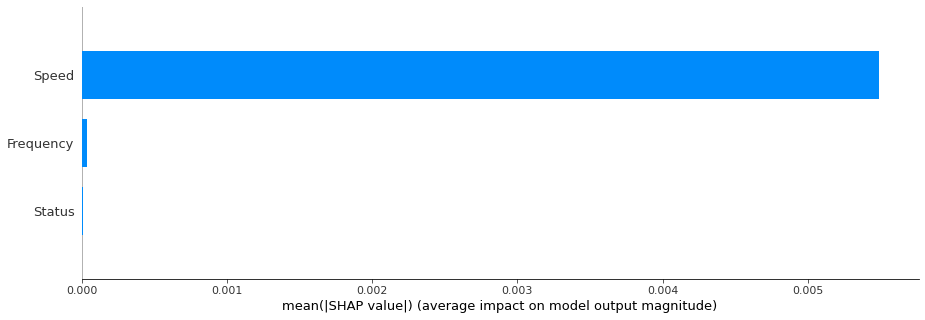

In [ ]:
"""
SHAP calculator using 'x_test_wrong.npy' for example
"""
X_test = np.load(folder_path + 'x_test_wrong.npy')
shap_calculator(X_train, X_test)

#SHAP heatmap picture from load data

In [ ]:
"""
Calculator each feature SHAP value, and the sum of SHAP value
"""
def shap_feature_calculator(load=True):
  if load:
    folder_path = folder
    file_name = fname
    shap_values_all = np.load(folder_path+str(file_name))

  shap_value = np.array(abs(shap_values_all))
  shap_values = np.sum(shap_value, axis=1)
  shap_values = np.sum(shap_values, axis=0)
  shap_values = np.sum(shap_values, axis=0)

  num = 0
  
  for num in range(len(shap_values)):
    value = shap_values[num]
    values.append(value)

  shap_values_sum = np.sum(shap_value)

  return shap_values_sum

"""
Show the heatmap of feature and sequence
"""
def shap_feature_sequence(load=True):
  if load:
    folder_path = folder
    file_name = fname
    shap_values_all = np.load(folder_path+str(file_name))

  shap_values_sum = shap_feature_calculator()

  shap_value = np.array(abs(shap_values_all))
  shap_values = np.sum(shap_value, axis=1)
  shap_values = np.sum(shap_values, axis=0)

  plt.figure(figsize=(20,2)) 
  sns.heatmap(shap_values.T, linewidth=0.0,cmap="Blues",yticklabels =['Speed', 'Status', 'Frequency'])
  plt.xlabel("Sequence")
  plt.show()

  for num in range(len(values)):
    value = values[num]/shap_values_sum
    print('Feature {0:10}:   {1:10.5f} %'.format(features[num], value*100))

"""
Show the heatmap of feature and data
"""
def shap_feature_data(load=True):
  if load:
    folder_path = folder
    file_name = fname
    shap_values_all = np.load(folder_path+str(file_name))
  
  shap_value = np.array(abs(shap_values_all))
  shap_values = np.sum(shap_value, axis=2)
  shap_values = np.sum(shap_values, axis=0)

  plt.figure(figsize=(20,2)) 
  sns.heatmap(shap_values.T, linewidth=0.0,cmap="Blues",yticklabels =['Speed', 'Status', 'Frequency'])
  plt.xlabel("Data")
  plt.show()

"""
Show the heatmap of feature and detail
"""
def shap_feature_detail(load=True):
  if load:
    folder_path = folder
    file_name = fname
    shap_values_all = np.load(folder_path+str(file_name))
  
  shap_value = np.array(abs(shap_values_all))
  shap_values = np.sum(shap_value, axis=1)
  shap_values = np.sum(shap_values, axis=1)

  shap_values_add = np.add(shap_values[0:13], shap_values[13:26])

  plt.figure(figsize=(20,2)) 
  sns.heatmap(shap_values_add.T, linewidth=0.0,cmap="Blues", xticklabels=detail, yticklabels =['Speed', 'Status', 'Frequency'])
  plt.xlabel("detail")
  plt.show()

  detail_value_sum = np.sum(shap_values_add, axis=1)

  for i in range(13):
    print("detail"+str(i+1))
    for num in range(3):
      value = shap_values_add[i][num]/detail_value_sum[i]
      print('Feature {0:10}:   {1:10.5f} %'.format(features[num], value*100))

"""
Show the heatmap of data and sequence
"""
def shap_data_sequence(load=True):
  if load:
    folder_path = folder
    file_name = fname
    shap_values_all = np.load(folder_path+str(file_name))

  shap_value = np.array(abs(shap_values_all))
  shap_values = np.sum(shap_value, axis=3)
  shap_values = np.sum(shap_values, axis=0)

  plt.figure(figsize=(20,5)) 
  sns.heatmap(shap_values, linewidth=0.0,cmap="Blues", yticklabels=False)
  plt.xlabel("Sequence")
  plt.ylabel("Data")
  plt.show()

"""
Show the heatmap of detail and sequence
"""
def shap_detail_sequence(load=True):
  if load:
    folder_path = folder
    file_name = fname
    shap_values_all = np.load(folder_path+str(file_name))

  shap_value = np.array(abs(shap_values_all))
  shap_values = np.sum(shap_value, axis=1)
  shap_values = np.sum(shap_values, axis=2)

  shap_values_add = np.add(shap_values[0:13], shap_values[13:26])

  plt.figure(figsize=(20,5)) 
  sns.heatmap(shap_values[0:13], linewidth=0.0,cmap="Blues", yticklabels=detail)
  plt.xlabel("Sequence")
  plt.ylabel("detail max")
  plt.show()

  plt.figure(figsize=(20,5)) 
  sns.heatmap(shap_values[13:26], linewidth=0.0,cmap="Blues", yticklabels=detail)
  plt.xlabel("Sequence")
  plt.ylabel("detail min")
  plt.show()

  plt.figure(figsize=(20,5)) 
  sns.heatmap(shap_values_add, linewidth=0.0,cmap="Blues", yticklabels=detail)
  plt.xlabel("Sequence")
  plt.ylabel("detail")
  plt.show()

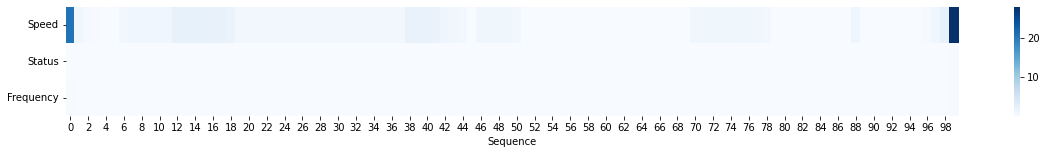

Feature Speed     :     98.71008 %
Feature Status    :      0.51790 %
Feature Frequency :      0.77203 %


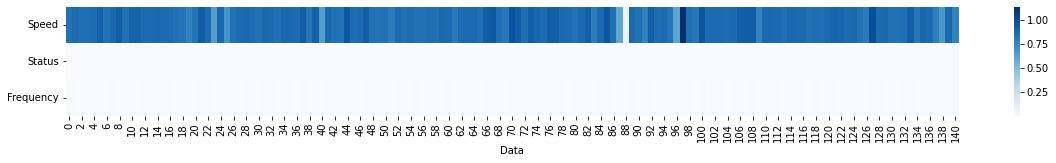

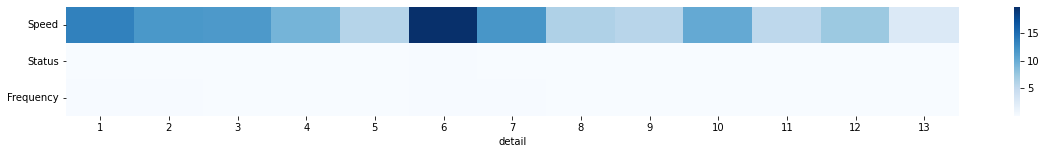

detail1
Feature Speed     :     98.68433 %
Feature Status    :      0.50882 %
Feature Frequency :      0.80685 %
detail2
Feature Speed     :     98.64425 %
Feature Status    :      0.53681 %
Feature Frequency :      0.81894 %
detail3
Feature Speed     :     98.72826 %
Feature Status    :      0.58219 %
Feature Frequency :      0.68955 %
detail4
Feature Speed     :     98.80404 %
Feature Status    :      0.45528 %
Feature Frequency :      0.74068 %
detail5
Feature Speed     :     98.76744 %
Feature Status    :      0.48634 %
Feature Frequency :      0.74622 %
detail6
Feature Speed     :     98.66477 %
Feature Status    :      0.56377 %
Feature Frequency :      0.77146 %
detail7
Feature Speed     :     98.74273 %
Feature Status    :      0.48749 %
Feature Frequency :      0.76978 %
detail8
Feature Speed     :     98.64628 %
Feature Status    :      0.54726 %
Feature Frequency :      0.80646 %
detail9
Feature Speed     :     98.80954 %
Feature Status    :      0.47634 %
Feature Frequency 

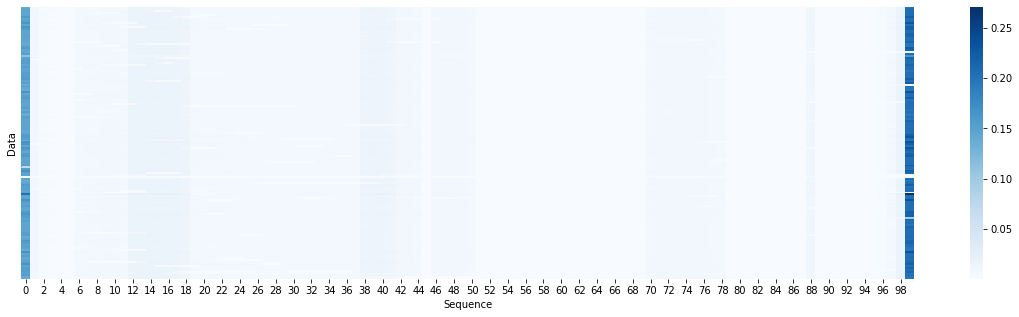

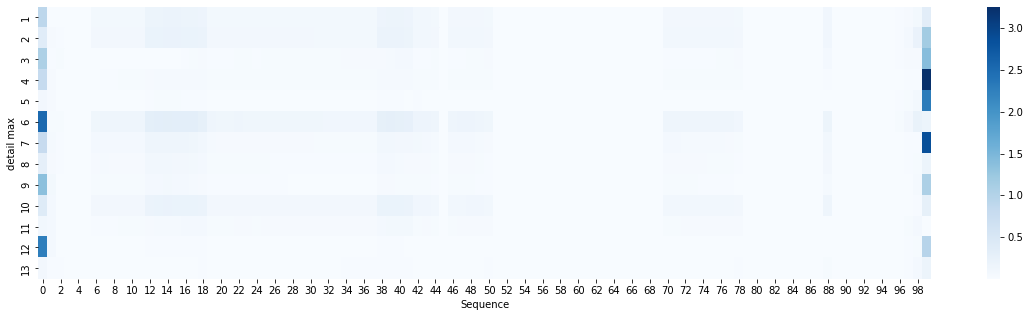

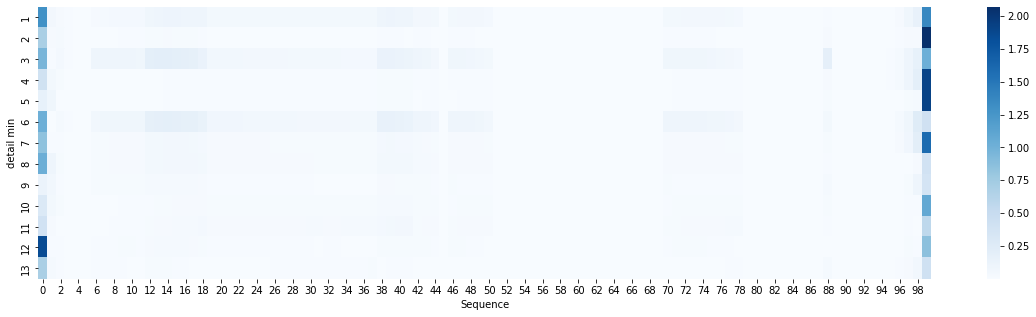

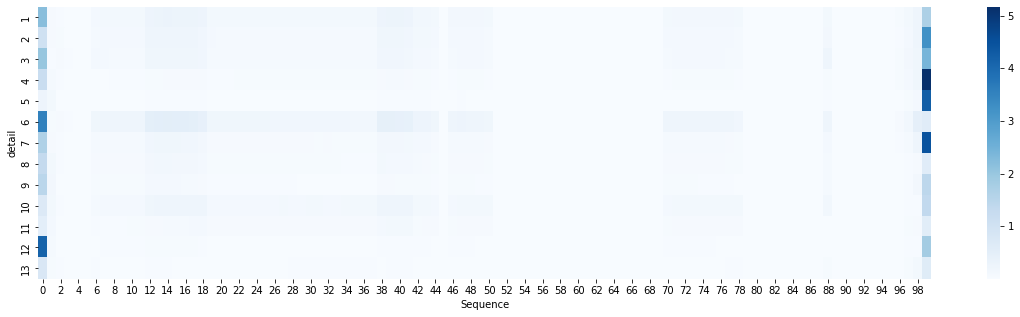

In [ ]:
"""
using 'shap.npy' from 'x_test.npy' for example
"""
values = []
shap_values_sum = 0
features = ['Speed', 'Status', 'Frequency']
detail = []
for i in range(1,14):
  detail.append(str(i))

sequence_num = 100

# put your folder path, ex: '/content/drive/MyDrive/.../'
folder = 'folderpath'
# put shap npy file path, ex: 'shap.npy'
fname = 'shap'
  
shap_feature_sequence(load=True)
shap_feature_data(load=True)
shap_feature_detail(load=True)
shap_data_sequence(load=True)
shap_detail_sequence(load=True)

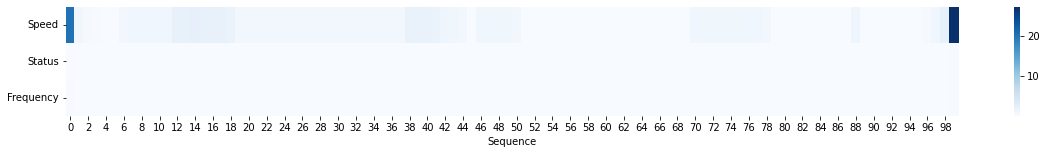

Feature Speed     :     98.71038 %
Feature Status    :      0.51746 %
Feature Frequency :      0.77216 %


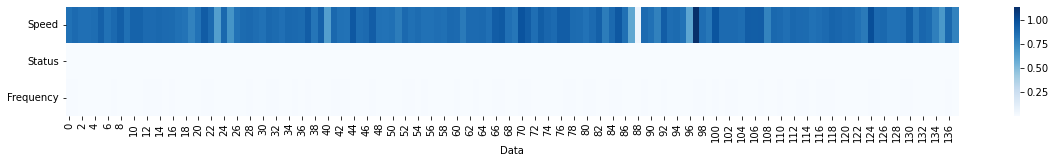

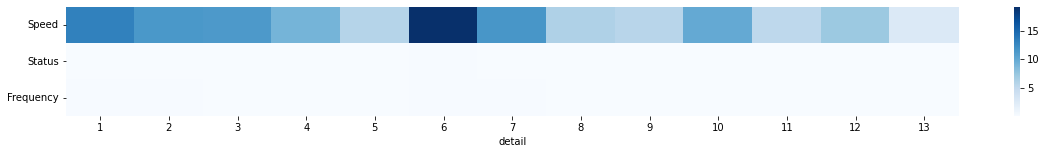

detail1
Feature Speed     :     98.68433 %
Feature Status    :      0.50886 %
Feature Frequency :      0.80682 %
detail2
Feature Speed     :     98.64471 %
Feature Status    :      0.53598 %
Feature Frequency :      0.81931 %
detail3
Feature Speed     :     98.72859 %
Feature Status    :      0.58201 %
Feature Frequency :      0.68939 %
detail4
Feature Speed     :     98.80383 %
Feature Status    :      0.45377 %
Feature Frequency :      0.74240 %
detail5
Feature Speed     :     98.76788 %
Feature Status    :      0.48376 %
Feature Frequency :      0.74836 %
detail6
Feature Speed     :     98.66521 %
Feature Status    :      0.56408 %
Feature Frequency :      0.77071 %
detail7
Feature Speed     :     98.74307 %
Feature Status    :      0.48642 %
Feature Frequency :      0.77051 %
detail8
Feature Speed     :     98.64684 %
Feature Status    :      0.54733 %
Feature Frequency :      0.80582 %
detail9
Feature Speed     :     98.80979 %
Feature Status    :      0.47598 %
Feature Frequency 

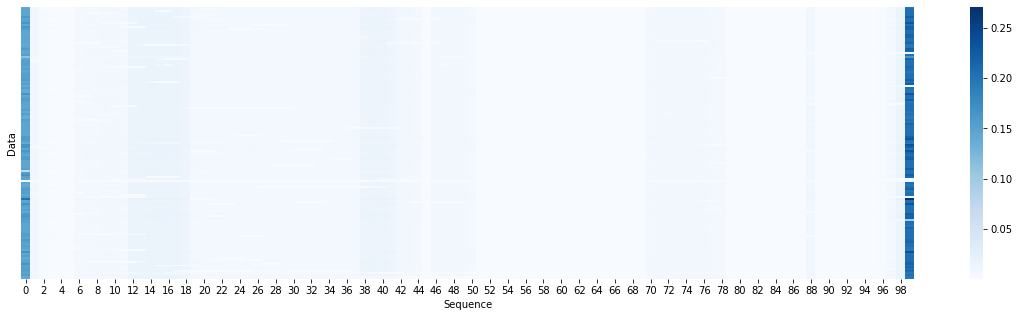

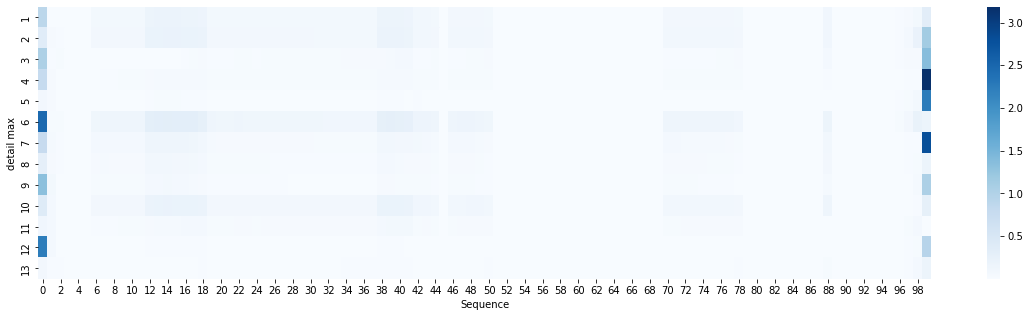

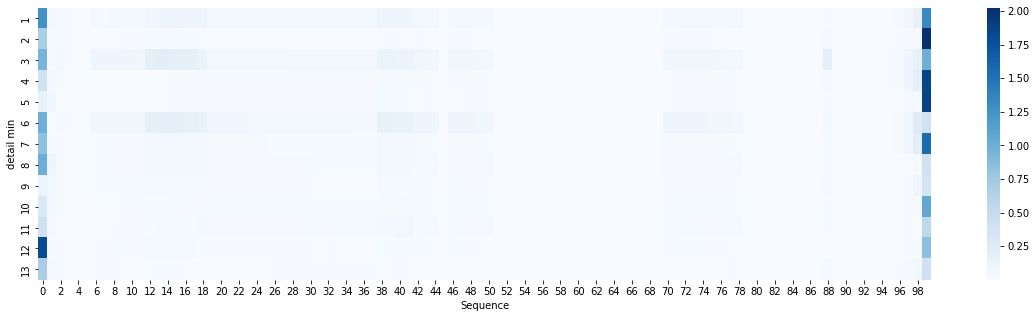

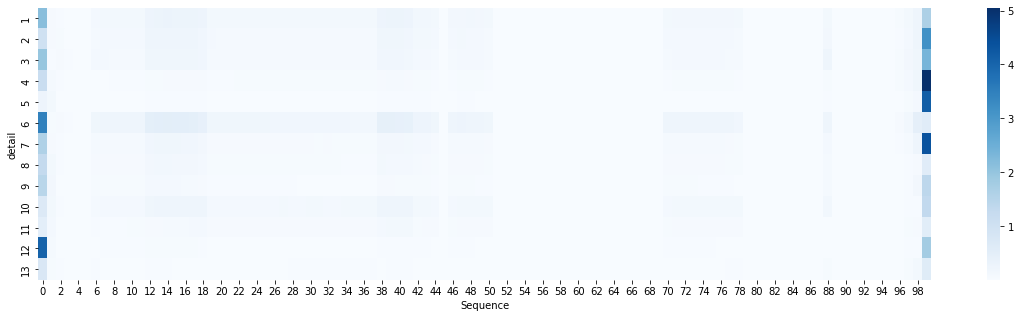

In [ ]:
"""
using 'shap_correct.npy' from 'x_test_correct.npy' for example
"""
values = []
shap_values_sum = 0
features = ['Speed', 'Status', 'Frequency']
detail = []
for i in range(1,14):
  detail.append(str(i))

sequence_num = 100

# put your folder path, ex: '/content/drive/MyDrive/.../'
folder = 'folderpath'
# put shap npy file path, ex: 'shap_correct.npy'
fname = 'shap'
  
shap_feature_sequence(load=True)
shap_feature_data(load=True)
shap_feature_detail(load=True)
shap_data_sequence(load=True)
shap_detail_sequence(load=True)

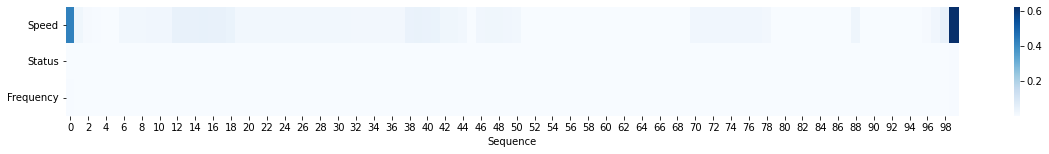

Feature Speed     :     98.69631 %
Feature Status    :      0.53770 %
Feature Frequency :      0.76599 %


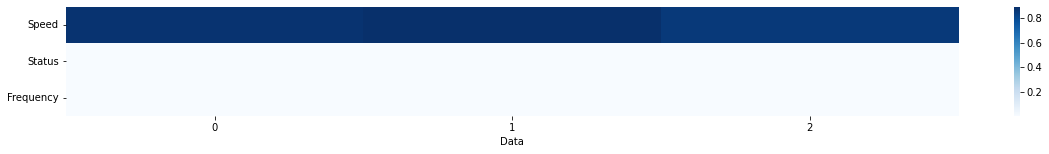

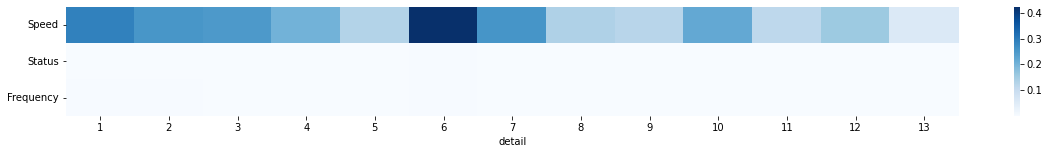

detail1
Feature Speed     :     98.68425 %
Feature Status    :      0.50731 %
Feature Frequency :      0.80844 %
detail2
Feature Speed     :     98.62336 %
Feature Status    :      0.57433 %
Feature Frequency :      0.80231 %
detail3
Feature Speed     :     98.71294 %
Feature Status    :      0.59043 %
Feature Frequency :      0.69663 %
detail4
Feature Speed     :     98.81343 %
Feature Status    :      0.52324 %
Feature Frequency :      0.66333 %
detail5
Feature Speed     :     98.74795 %
Feature Status    :      0.60121 %
Feature Frequency :      0.65084 %
detail6
Feature Speed     :     98.64444 %
Feature Status    :      0.54995 %
Feature Frequency :      0.80561 %
detail7
Feature Speed     :     98.72729 %
Feature Status    :      0.53569 %
Feature Frequency :      0.73701 %
detail8
Feature Speed     :     98.62062 %
Feature Status    :      0.54389 %
Feature Frequency :      0.83549 %
detail9
Feature Speed     :     98.79781 %
Feature Status    :      0.49256 %
Feature Frequency 

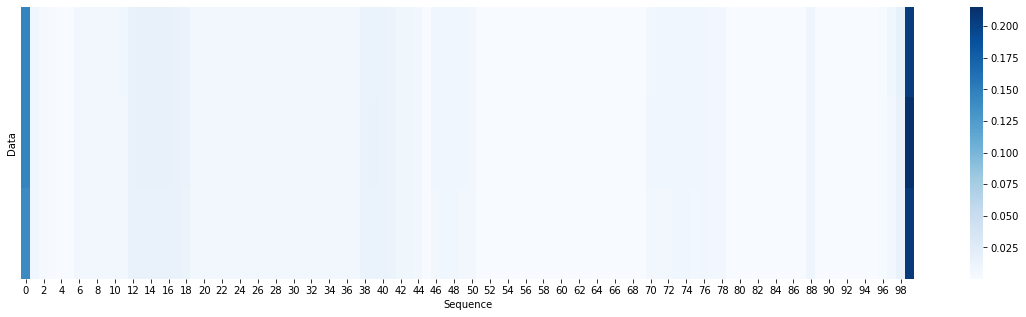

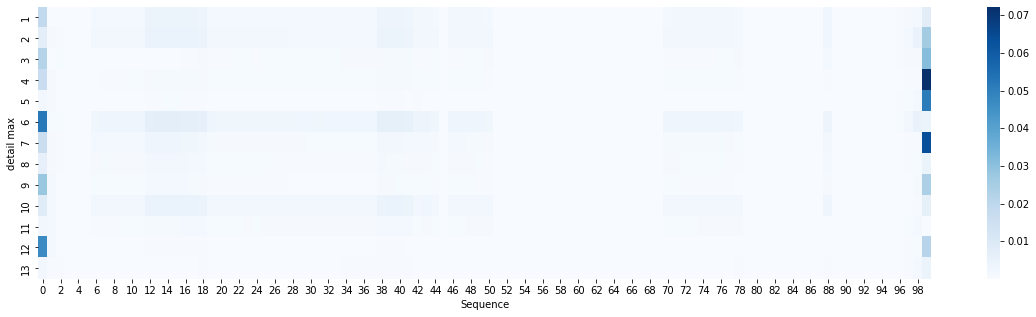

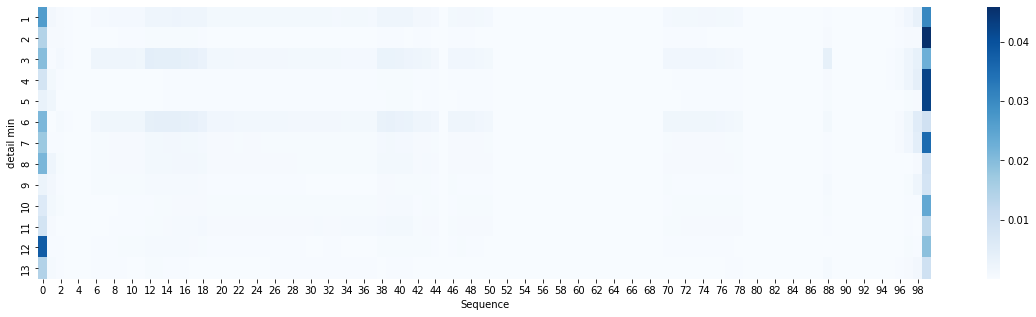

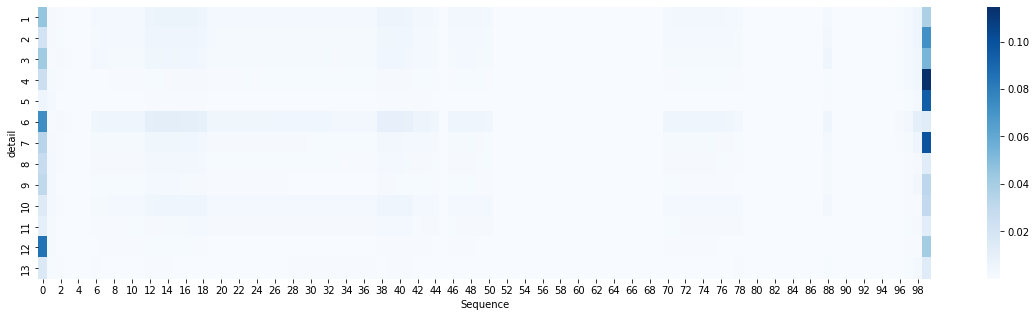

In [ ]:
"""
using 'shap_wrong.npy' from 'x_test_wrong.npy' for example
"""
values = []
shap_values_sum = 0
features = ['Speed', 'Status', 'Frequency']
detail = []
for i in range(1,14):
  detail.append(str(i))

sequence_num = 100

# put your folder path, ex: '/content/drive/MyDrive/.../'
folder = 'folderpath'
# put shap npy file path, ex: 'shap_wrong.npy'
fname = 'shap'
  
shap_feature_sequence(load=True)
shap_feature_data(load=True)
shap_feature_detail(load=True)
shap_data_sequence(load=True)
shap_detail_sequence(load=True)